## In this CC, we will implement K-Means clustering algorithm from scratch

Objectives:
1. Be able to list and understand steps of K-Mean algorithm
2. Be able to implement those steps.
3. Understand their computational complexity

For a deeper look into k-means, take a look at https://en.wikipedia.org/wiki/K-means_clustering

### Pseudo-Code:

1. Pick a random starting point c_k for k clusters.
2. For each point, add it to the set $S_k$ of the centroid $c_k$ it is closest to.
3. Recompute each $c_k$ as the mean (centroid) of each set $S_k$.
4. Do until $c_k$ doesn't change for any $k$ (or max iter is hit).

In [0]:

'''
K-means steps:
    Pick a random starting point c_k for k clusters
    For each point, add it to the set S_k of the centroid it is closest to
    Recompute c_k as the mean (centroid of the set S_k)
    Do until c_k doesn't change for any k
    
    
For large collections of points iteration till convergence can take very long time.
Some predefined number of iterations is used to make it feasible
'''

# Set up some hyper-parameters:

max_iterations = 50
k = 3

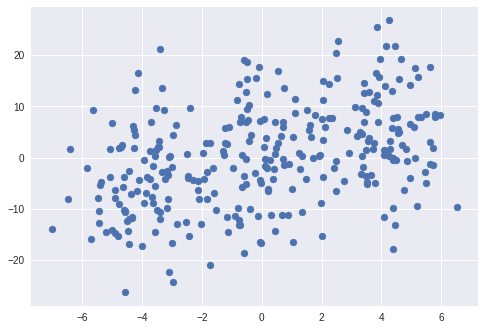

In [2]:
# Define some points in 3 clusters and plot them
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

points = np.vstack(((np.random.multivariate_normal([0, 0], [[1, 0], [0, 100]] , 100)),
                  (np.random.multivariate_normal([4, 4], [[1, 0], [0, 100]] , 100)),
                  (np.random.multivariate_normal([-4, -4], [[1, 0], [0, 100]] , 100))))

plt.scatter(points[:, 0], points[:, 1]);

In [3]:
# Choose k random points from the set to be our starting "centroids"
centroids = np.random.permutation(points)[:k]
centroids

array([[ -0.7232278 , -13.12571834],
       [ -1.92816322,  -4.19532355],
       [  0.54057658,   2.76300677]])

In [0]:
# Write a function that returns the centroid that is nearest to it
def nearest_centroid(point, centroids):
    return np.argmin(np.linalg.norm(point-centroids, axis=1))

# Write a function that uses the above function, computing which centroid is 
# nearest to _every_ point
def assign_clusters(points, centroids):
    clusters = [nearest_centroid(point, centroids) for point in points]
    return np.array(clusters)

In [0]:
# Recalculate the centroids for each cluster based on the points that were added
# to it.
def get_new_centroids(points, cluster_assignments, k):
    centroids = [np.mean(points[cluster_assignments==c], axis=0) for c in range(k)]
    return np.array(centroids)

In [0]:
# Run the above functions max_iterations times and plot the result
for _ in range(max_iterations):
    clusters = assign_clusters(points, centroids)
    new_centroids = get_new_centroids(points, clusters, k)
    if (new_centroids==centroids).all():
        break

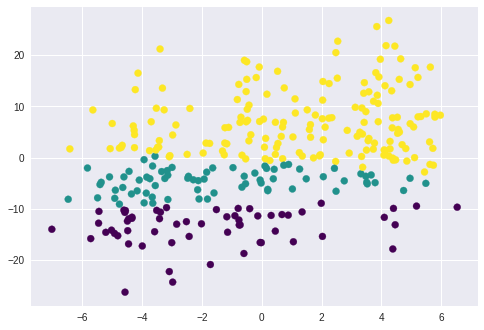

In [7]:
plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap='viridis');